In [10]:
import qubic.toolchain as tc
import qubic.rpc_client as rc
import qubitconfig.qchip as qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
import chipcalibration.cross_resonance as _xr
from importlib import reload
import qubic.state_disc as sd
import chipcalibration.config as cfg
import qubic.job_manager_jpm as _jm
import chipcalibration.rabi_experiments as _rabi

In [5]:
fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 'jump_cond_clks': 5, 'jump_fproc_clks': 5, 'pulse_regwrite_clks': 3})

qchipname = 'X4Y2'
fpga_config, qchip, channel_config = _cfg.load_configs(qchipname, qchip_file='qubitcfg.json')

runner = _rc.CircuitRunnerClient(ip='192.168.1.247')
jm = _jm.JobManager(fpga_config, channel_config, runner, qchip)

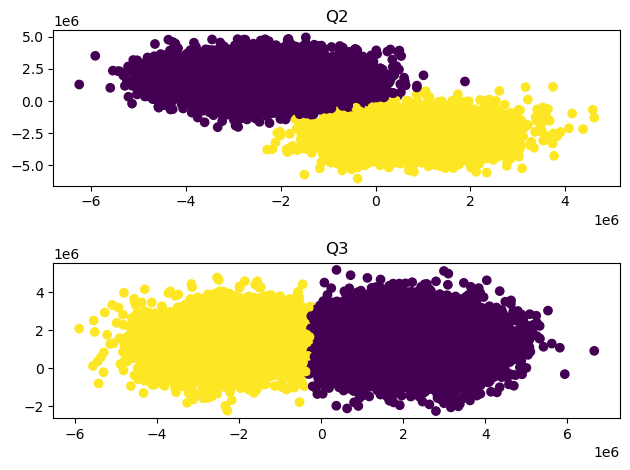

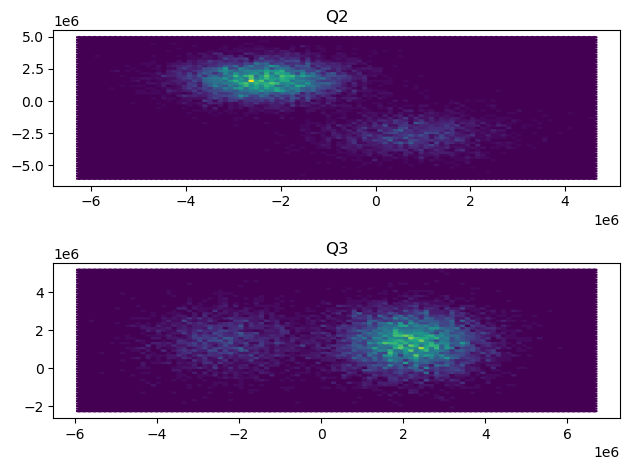

In [6]:
register = ['Q2', 'Q3']
target_amplitude = qchip.gates['Q2X90'].cfg_dict[0]['amp']
pulse_width_interval = np.linspace(1e-9, 100e-9, 10)

gmm_rabi = _rabi.GMMRabi(register, target_amplitude, pulse_width_interval, 
                       channel_configs=channel_config)

gmm_rabi.run_and_report(jm, 1000, qchip)

# CR Tomography

In [79]:
reload(_xr)

<module 'chipcalibration.cross_resonance' from '/home/jpmarceaux/chipcalibration/chipcalibration/cross_resonance.py'>

In [80]:
jobman = _jm.JobManager(fpga_config, channel_config, runner, qchip,
                       gmm_manager=gmm_rabi.gmm_manager)

In [81]:
pulse_width_interval = np.linspace(10e-9, 400e-9, 10)
drive_amp = 0.5

In [82]:
icr = _xr.CrossResonanceTomography('Q3', 'Q2', 
                                    pulse_width_interval, drive_amp, pulse_type='std')

[(array([0.00000000e+00, 7.27147644e-05, 3.13518898e-05]), array([[ 3.27881149e+14,  0.00000000e+00, -1.25975459e+12],
       [ 0.00000000e+00,  1.26343979e+12,  0.00000000e+00],
       [-1.25975459e+12,  0.00000000e+00,  1.25975459e+12]])), (array([ 0.001     ,  0.00232956, -0.00048186]), array([[3.03863759e+14, 6.42126672e+11, 0.00000000e+00],
       [6.42126672e+11, 1.16750304e+12, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.18363361e+12]]))]
{'IX': 0.0012011352145921438, 'IY': -0.0002252521372599248, 'IZ': 0.0005, 'ZX': -0.0011284204501578019, 'ZY': 0.0002566040270655562, 'ZZ': -0.0005}


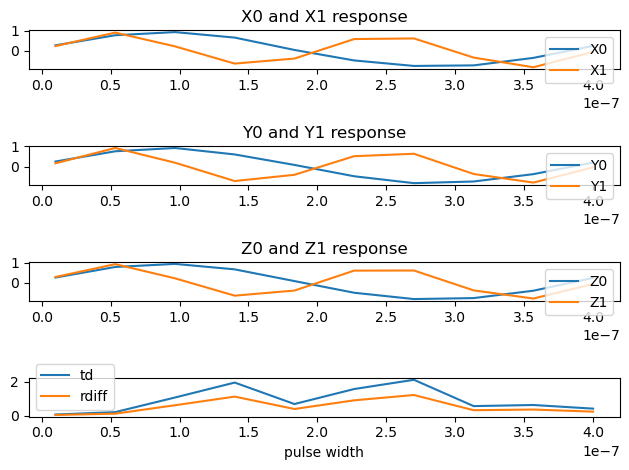

In [83]:
icr.run_and_report(jobman, 1000, qchip)

In [84]:
icr.rates

{'IX': 0.0012011352145921438,
 'IY': -0.0002252521372599248,
 'IZ': 0.0005,
 'ZX': -0.0011284204501578019,
 'ZY': 0.0002566040270655562,
 'ZZ': -0.0005}